In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Parabolic motion.

How to get the initial velocities from the height $h$ and the range $R$

The equations are:
    
$h = \frac{1}{2} g v_y^2$

$R = \frac{2 v_x v_y}{g}$

$v_x = \sqrt{\frac{g}{8}}$

$v_y = \sqrt{2gh}$


After measuring a lot of times we get the following results:

$R = 1.0 \pm 0.2 m$

$h = 1 \pm 0.2 m$

# 1. Error propagation

$v_x^{0} = \sqrt{\frac{g}{8}} \frac{10}{\sqrt{1}} = 11.2 m s^{-1}$

$v_y^{0} = \sqrt{2g1} = 4.47 m s^{-1}$

$ln v_x = ln \sqrt{\frac{g}{8}} + ln R - \dfrac{1}{2} ln h$

$\frac{\sigma_{v_x}}{v_x} = \sqrt{ \left( \frac{\sigma_{R}}{R} \right)^2 + \frac{1}{4}\left( \frac{\sigma_h}{h} \right)^2} = 0.1$

$\frac{\sigma_{v_y}}{v_y} = \dfrac{1}{R} \dfrac{\sigma_h}{h} = 0.1$

# 2. Monte Carlo method (For frenquitist statistics)

In [9]:
h = np.random.normal(1.0, 0.2, 10000)
R = np.random.normal(10.0, 0.2, 10000)

In [10]:
g = 9.8
def velocities(h, R):
    vx = np.sqrt(g/8.0) * R / np.sqrt(h)
    vy = np.sqrt(2*g*h)
    return vx, vy
    

In [21]:
vx_mc, vy_mc = velocities(h, R)


In [41]:
# This is the correlation given by R
vx_1= np.linspace(7, 25)
vy_1 = 10.0*g/(2.0*vx_1)

In [42]:
# Histogram from the error propagation

vx_ep = np.random.normal(11.2, 0.1, 10000)
vy_ep = np.random.normal(4.47, 0.1, 10000)

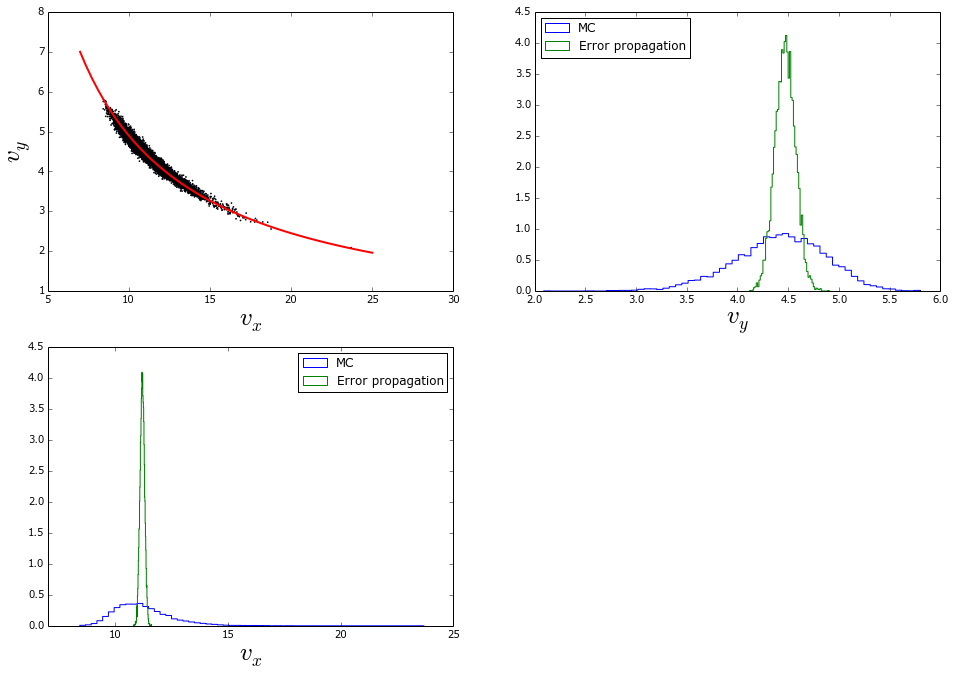

In [68]:
figure(figsize=(16, 11))
subplot(2, 2, 1)
scatter(vx_mc, vy_mc, s=0.5)
plot(vx_1, vy_1, c='r', lw=2.0)
xlabel('$v_x$', fontsize=25)
ylabel('$v_y$', fontsize=25)

subplot(2, 2, 2)
h1 = hist(vy_mc, bins=60, histtype='step', label='MC', normed='True')
h12 = hist(vy_ep, bins=60, histtype='step', label='Error propagation', normed='True')
legend(loc='best')
xlabel('$v_y$', fontsize=25)
subplot(2, 2, 3)
h2 = hist(vx_mc, bins=60, histtype='step', label='MC', normed='True')
h22 = hist(vx_ep, bins=60, histtype='step', label='Error propagation', normed='True')
xlim(7, 25)
legend(loc='best')
xlabel('$v_x$', fontsize=25)

In [69]:
index_1 = np.where(h1[0]==max(h1[0]))[0]
index_2 = np.where(h2[0]==max(h2[0]))[0]

print h1[1][index_1]
print h2[1][index_2]

[ 4.44156338]
[ 10.96963752]


we see that the values of $vx$ and $vy$ using the montecarlo method are highly correlated, one of the observables (R) is more tighly constrait that the other one.

HW: over plot the confidence levels, and the most likely values from the code of last class.

## Say always, I use frenquitis/Baysian, compute the likelihood with MC or Analyticaly, and the convergence algoroth say (Metropolis)

# 3. analyticaly method to compute the likelihood  if you have low number of parameters.

In [72]:
def Puxuy(ux, uy, sigma_r, sigma_h):
    P = uy**2/(np.pi*sigma_r*sigma_h*g**2) * exp(-(R-R_0)**2/(2*sigma_r))
    

In [87]:
def Puy(uy, sigma_h, h_0):
    g = 10.0
    puy = uy/(np.sqrt(2.0*np.pi)*sigma_h*g)*exp(-(uy**2/(2.0*g) - h_0)**2.0/(2.0*sigma_h**2))
    return puy

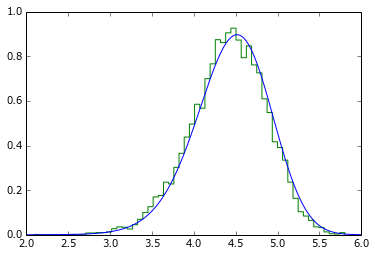

In [88]:
uy_an = linspace(2, 6.0, 1000)
puy_an = Puy(uy_an, 0.2, 1.0)
plot(uy_an,puy_an)
h1 = hist(vy_mc, bins=60, histtype='step', label='MC', normed=True)


# 4. Bayesian approach

In [92]:
def Puy_bayes(u_y, sigma_h, h_0):
    g = 10.0
    puy = 1/(u_y)*exp(-(u_y**2/(2.0*g) - h_0)**2.0/(2.0*sigma_h**2))
    return puy

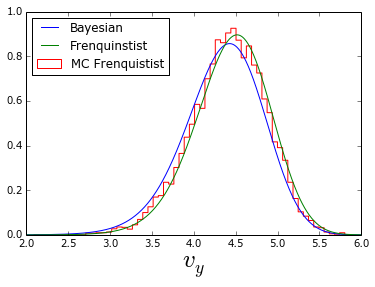

In [108]:
puy_an_bayes = Puy_bayes(uy_an, 0.2, 1.0)
I = sum(puy_an_bayes)*(uy_an[2]-uy_an[1])

plot(uy_an, puy_an_bayes/I, label='Bayesian')
plot(uy_an, puy_an, label='Frenquinstist')
h1 = hist(vy_mc, bins=60, histtype='step', label='MC Frenquistist', normed=True)
legend(loc='best')
xlabel('$v_y$', fontsize=25)